In [22]:
import geopandas as gpd
from geopy.geocoders import Nominatim
import pandas as pd
from shapely.geometry import Point
import os
import geoplot
import geoplot.crs as gcrs


In [30]:
#Load in data cleaned, rename column to UUID


df = pd.read_csv('../data/processed/uber_data_cleaned.csv')
df.rename(columns={'Unnamed: 0': 'UUID'}, inplace=True)
print(df.head())

/Users/mattrodosky/Desktop/repos/Project-2/notebooks
       UUID                            key  fare_amount  \
0  24238194    2015-05-07 19:52:06.0000003          7.5   
1  27835199    2009-07-17 20:04:56.0000002          7.7   
2  44984355   2009-08-24 21:45:00.00000061         12.9   
3  25894730    2009-06-26 08:22:21.0000001          5.3   
4  17610152  2014-08-28 17:47:00.000000188         16.0   

             pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1  2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2  2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3  2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4  2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count pickup_time  
0         -73.999512         40.723217                1    19:52:06  
1         -73.994710         40.750325           

In [67]:
#Read in borough data information
boroughs = gpd.read_file("../data/raw/BoroughData.geojson")
print(boroughs.head())
print(boroughs.info())

  boro_code      boro_name     shape_area     shape_leng  \
0         3       Brooklyn  1934142775.63  728147.130565   
1         5  Staten Island  1623618684.31  325910.306061   
2         1      Manhattan  636646082.483  360037.525777   
3         2          Bronx  1187174772.32  463180.578878   
4         4         Queens   3041418003.6  888197.010944   

                                            geometry  
0  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
1  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
3  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   boro_code   5 non-null      object  
 1   boro_name   5 non-null      object  
 2   shape_area  5 non-null      

geometry


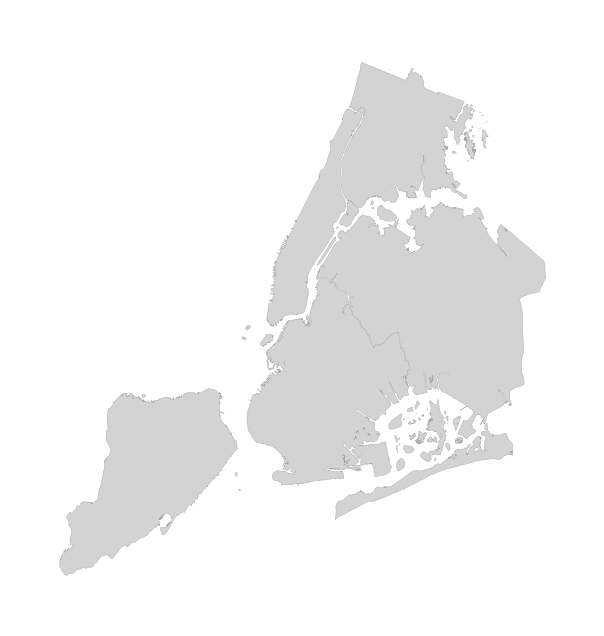

In [71]:
#Mapping out boroughs to make sure data is correct
geoplot.polyplot(
    boroughs,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)
print(boroughs.geometry.name)


In [77]:
#Looping over df info and assigning boro names to pick up and drop off locations

# Create an empty dictionary to store results
pickup_borough_mapping = {}
dropoff_borough_mapping = {}
# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Create a Point for the pickup coordinates
    pickup_point = Point(row['pickup_longitude'], row['pickup_latitude'])
    dropoff_point = Point(row['dropoff_longitude'], row['dropoff_latitude'])
    # Check which borough contains this point
    for _, borough in boroughs.iterrows():
        if borough['geometry'].contains(pickup_point):
            pickup_borough_mapping[row['UUID']] = borough['boro_name']
            break
        if borough['geometry'].contains(dropoff_point):
            dropoff_borough_mapping[row['UUID']] = borough['boro_name']


In [82]:
#Mapping the boro data to dataframe
df['Pickup_Borough'] = df['UUID'].map(pickup_borough_mapping)
df['Dropoff_Borough'] = df['UUID'].map(dropoff_borough_mapping)
print(df.head())

       UUID                            key  fare_amount  \
0  24238194    2015-05-07 19:52:06.0000003          7.5   
1  27835199    2009-07-17 20:04:56.0000002          7.7   
2  44984355   2009-08-24 21:45:00.00000061         12.9   
3  25894730    2009-06-26 08:22:21.0000001          5.3   
4  17610152  2014-08-28 17:47:00.000000188         16.0   

             pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1  2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2  2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3  2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4  2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count pickup_time  \
0         -73.999512         40.723217                1    19:52:06   
1         -73.994710         40.750325                1    20:04:56   
2         -73.962565         

In [84]:
output_path = '../data/processed/Updated_Uber_data'
df.to_csv(output_path, index=False)
print('Dataframe exported')

Dataframe exported
